## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

In [43]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [44]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [45]:
# Combine the data into a single dataset
combined_df = study_results.merge(mouse_metadata, on = "Mouse ID")
combined_df.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [46]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df=combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
#This step returns an array of ALL duplicated mouse data. Although our data only has 1 duplicate, if there were more this array would be longer
duplicated_mice = duplicated_mouse_df["Mouse ID"].unique()
duplicated_mice


array(['g989'], dtype=object)

In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#The for loop only goes 1 time in our case, but in other datasets this could run multiple times
clean_df=combined_df
for mouseid in duplicated_mice:
    clean_df=clean_df[clean_df["Mouse ID"]!= mouseid]

In [50]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group=clean_df.groupby("Drug Regimen")
regimens=regimen_df["Tumor Volume (mm3)"]
means=regimens.mean()
meds=regimens.median()
variance = regimens.var()
stdevs = regimens.std()
sems = regimens.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": means,
              "Median": meds,
              "Variance": variance,
              "Standard Deviation": stdevs,
              "SEM": sems})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
other_sum_df = clean_df.groupby("Drug Regimen").agg(['mean','median', 'var','std','sem'])["Tumor Volume (mm3)"]
other_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

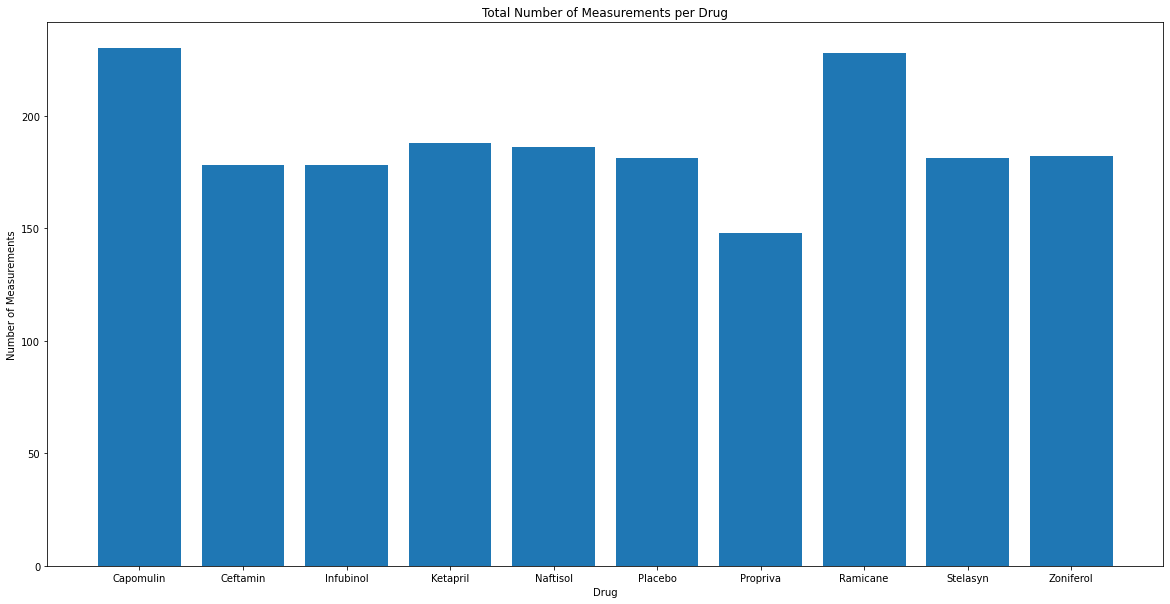

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [93]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements=regimen_group["Mouse ID"].count()
pyplotfig=plt.figure(figsize=(20,10))
plt.bar(other_sum_df.index.to_list(),measurements)
plt.title("Total Number of Measurements per Drug")
pyplotfig.xlabel("Drug")
pyplotfig.ylabel("Number of Measurements")


AttributeError: 'Figure' object has no attribute 'bar'

<Figure size 1440x720 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
